<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/01_%EC%A0%84_%EC%84%B8%EA%B3%84_%ED%96%89%EB%B3%B5_%EC%A7%80%EC%88%98%EB%A5%BC_%ED%91%9C%ED%98%84%ED%95%98%EB%8B%A4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **전 세계 행복 지수를 표현하다**

---

전 세계 행복 지수를 통해 사람들이 행복하다고 여기는 요소들을 살펴보고, 데이터를
다양한 그래프로 시각화하여 한눈에 알아보기 쉽게 표현하는 방법을 알아봅니다.  

> ### 1. 문제정의  
  - 전 세계 행복 지수 표현  
  
> ### 2. 데이터 불러오기  
  - 행복 지수 데이터 셋  

> ### 3. 데이터 탐색 및 시각화하기  
  - 데이터 정리 후 시각화
  - 다양한 시각화 표현
  - 상관관계 시각화

### **1. 라이브러리 불러오기**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **2. 파일 업로드하기**

In [ ]:
from google.colab import files
uploaded = files.upload()           #파일 선택 창을 통해 파일을 불러와 'uploaded'라는 변수로 파일 지정

### **3. 판다스로 파일 읽어 들이기**
---
#### **데이터프레임 객체 = 판다스 객체.read_csv(경로 변수)**
---
판다스 라이브러리의 read_csv( ) 함수를 사용하여 파일을 코랩 노트북으로 읽어 들임.

In [ ]:
data_path = '/content/world-happiness-report-2021.csv'
happiness_data = pd.read_csv(data_path)
happiness_data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


### **4. 데이터 살펴보기**  

---
#### **데이터프레임 객체.info( )**
---

info() 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 유형 등 확인

In [ ]:
happiness_data.info()

총 149개의 데이터로 구성

* 속성 : 20개
* 결측치(Non-Null) : 없음
* 속성별 데이터 유형 : 실수형(float64) 18개, 문자열(object) 2개


---
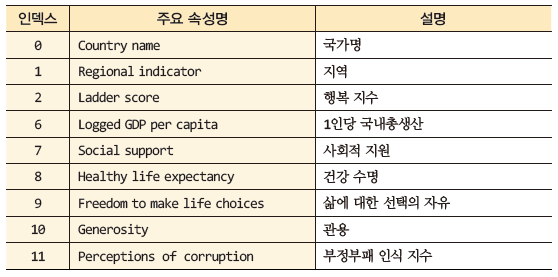


### **5. 주요 속성 추출하기**

전체 데이터 중 일부 속성을 추출하기 위해 판다스의 **iloc[]** 메소드를 사용


---


#### **데이터프레임 객체.iloc[추출할 행 인덱스, 추출할 열 인덱스]**


---


* 데이터프레임 객체.iloc[0:5]    # 상위 5개 행과 모든 열
* 데이터프레임 객체.iloc[:, 0:2] # 모든 행과 첫 2개 열
* 데이터프레임 객체.iloc[[0, 3, 6, 24], [0, 5, 6]] # [0, 3, 6, 24] 행과 [0, 5, 6] 열만
* 데이터프레임 객체.iloc[0:5, 5:8] # 상위 5개 행과 [5, 6, 7] 열만

In [ ]:
happiness = happiness_data.iloc[:, [0,1,2,6,7,8,9,10,11]] # 주요 속성 인덱스
happiness
#happiness.head() # head( ) 함수의 기본값은 5이므로 5는 생략 가능

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


### **6. 데이터 통계치 살펴보기**
---
#### **데이터프레임 객체.describe()**
---
데이터의 통계량(개수, 평균, 표준편차, 최솟값, 4분위수, 최댓값)을 파악하기 위해
describe() 메소드를 사용.  
수칫값(실수형, 정수형)을 갖는 속성에 대한 통계량을 출력하며 결측치는 제외.

In [ ]:
happiness.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


### **7. 속성 기준으로 데이터 정렬하기**  

우선 행복 지수(Ladder score) 속성을 기준으로 데이터를 나라별로 정렬합니다.  
데이터를 정렬할 때는 sort_values() 메소드를 사용합니다.  

---
* #### **데이터프레임 객체.sort_values(by = '정렬 기준이 되는 속성명', ascending = True/False)**
* #### **데이터프레임 객체.loc[추출할 행, 추출할 열]**
---

###❓ 우리나라의 행복 순위는 몇 위일까요?

In [ ]:
happiness = happiness.sort_values(by = 'Ladder score', ascending = False)
happiness
#happiness.loc[happiness['Country name'] == 'South Korea']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


###**8. 나라별 행복 지수 파악하기 : 시본 사용하여 시각화**

seaborn 공식 사이트 : https://seaborn.pydata.org/index.html  
seaborn 그래프 예시 : https://seaborn.pydata.org/examples/index.html  
![시본 그래프](https://velog.velcdn.com/images/jane15/post/ad3f8ef7-03c3-45d6-8a31-061ad373ec01/image.png)
> 시간에 따른 변화 -> line, area, bar  
비교와 랭킹 -> bar  
연관성 -> scatter  
분포 -> box plot, histogram  
부분이 전체에 차지하는 정도 -> pie, bar  

####[ 가로형 막대그래프 출력 ]
---
### **sns.barplot(x = 'x축 이름', y = 'y축 이름', data = 데이터프레임 객체, palette = '색상')**
---
barplot( )의 괄호 안에 x, y축 이름 및 그래프 색상 정보 설정

<Axes: xlabel='Ladder score', ylabel='Country name'>

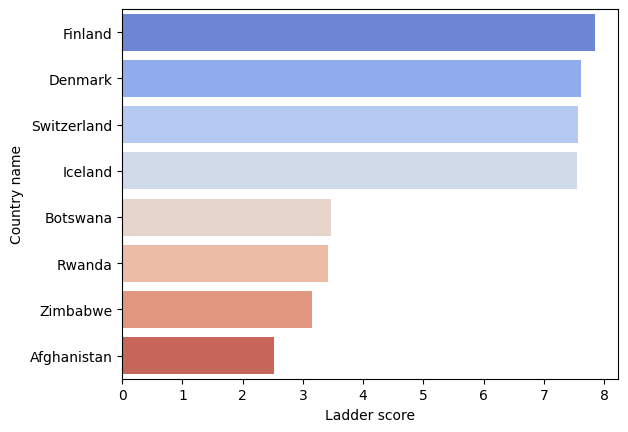

In [ ]:
import seaborn as sns

happinessFilter = (happiness.loc[:, 'Ladder score'] >= 7.5)|\
                  (happiness.loc[:, 'Ladder score'] <= 3.5)
sns.barplot(x = 'Ladder score', y = 'Country name',\
            data = happiness[happinessFilter], palette = 'coolwarm')

### ✅ 도전!!  
다음 조건에 맞는 가로형 막대그래프를 출력해 봅시다.

• 1인당 국내총생산을 기준으로 내림차순으로 정렬한다.  
• x축을 1인당 국내총생산(Logged GDP per capita)으로 변경한다.  
• 1인당 국내총생산이 11.1 이상인 나라와 7.2 이하인 나라만 그래프로 출력한다.  
• 색상 팔레트를 ‘PiYG’로 설정한다.  

<Axes: xlabel='Logged GDP per capita', ylabel='Country name'>

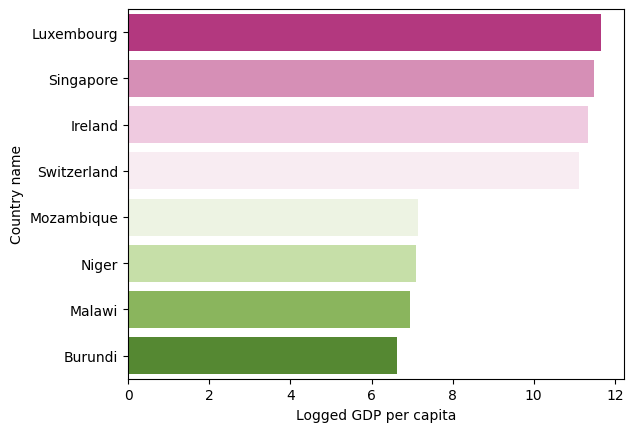

In [ ]:
happiness = happiness.sort_values(by='Logged GDP per capita',ascending = False)
happinessFilter = (happiness.loc[:,'Logged GDP per capita'] >= 11.1) | \
                  (happiness.loc[:,'Logged GDP per capita'] <= 7.2)
sns.barplot(x='Logged GDP per capita', y='Country name', data = happiness[happinessFilter], palette='PiYG')

### **9. 지역(Regional indicator)별 나라의 개수 시각화**

---
* ### **sns.countplot(x='속성명', data=데이터프레임 객체)**  

  x축은 속성명, y축은 개수(count) 출력
---
* ### **plt.xticks(rotation = 회전 각도)**  
  x축의 label의 회전 각도 설정
---
* ### **plt.grid(axis = '방향', c= '색상', linestyle = '선 종류')**  
  axis의 '방향'이 'x'이면 세로 방향, 'y'이면 가로 방향
---

<Axes: xlabel='Regional indicator', ylabel='count'>

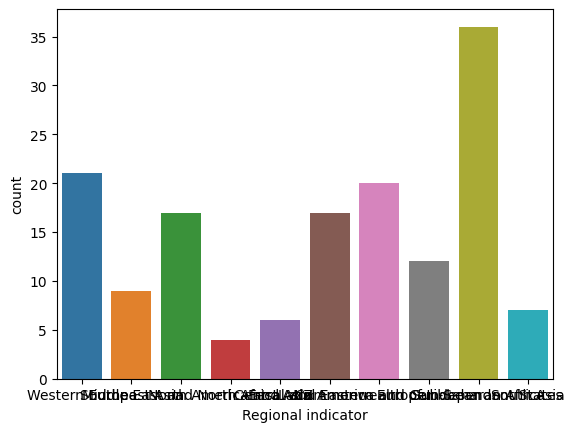

In [ ]:
sns.countplot(x='Regional indicator', data=happiness)
# plt.xticks(rotation = 80)
# plt.grid(axis = 'y', c = 'gray', linestyle = '--')

### **10. 지역(Regional indicator)별 행복 지수의 분포 시각화**
---
* ### **sns.boxplot(x = '속성명', y = '속성명', data = 데이터프레임 객체, orient = 'h/v')**  
---
x축과 y축은 속성명, data는 데이터프레임 객체, orient는 방향(h는 가로, v는 세로)

<Axes: xlabel='Ladder score', ylabel='Regional indicator'>

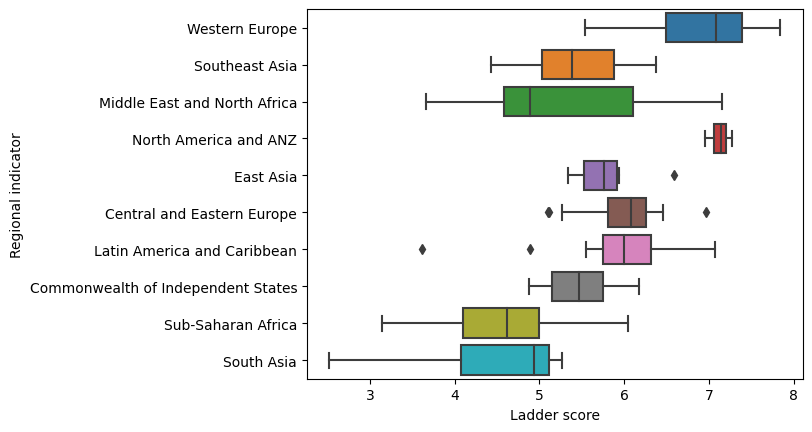

In [ ]:
sns.boxplot(x = 'Ladder score', y = 'Regional indicator', data = happiness, orient = 'h')

### ✅ 도전!!  
다음 조건에 맞는 boxplot을 출력해 보고, 위 boxplot과 비교해 봅시다.  

• x축과 y축의 속성값을 바꾸고, boxplot을 세로로 출력한다.  
• 레이블을 회전하는 코드를 추가하여 x축의 레이블이 서로 겹치지 않게 한다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'Southeast Asia'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'North America and ANZ'),
  Text(4, 0, 'East Asia'),
  Text(5, 0, 'Central and Eastern Europe'),
  Text(6, 0, 'Latin America and Caribbean'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'South Asia')])

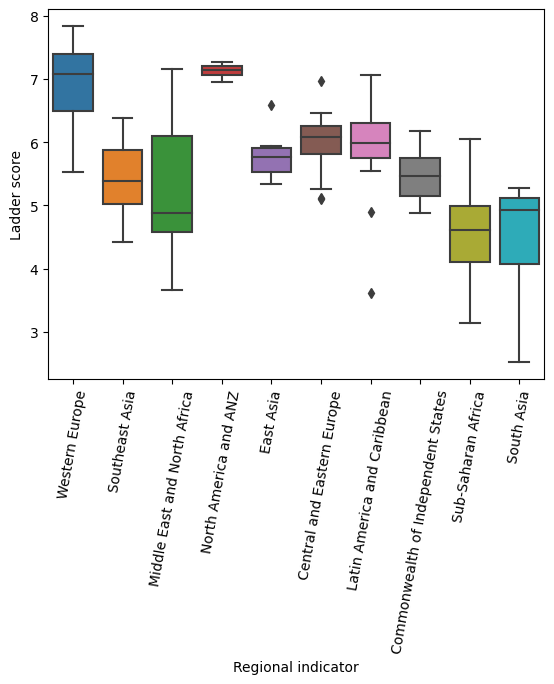

In [ ]:
sns.boxplot(x = 'Regional indicator', y = 'Ladder score',  data = happiness, orient = 'v')
plt.xticks(rotation = 80)

### **▶ 반응형 그래프(Interactive graph)로 시각화하기**  

plotly library의 treemap(), sunburst(), choropleth() 사용하기

###**11. plotly사용하여 시각화하기 : treemap 시각화**  

---
* #### **px.treemap(data_frame = 데이터프레임 객체, path = [부모 열, 자식 열],values = 열 속성, color = 열 속성)**  
---
path는 [부모, 자식] 순서로 작성, values는 사각형 크기가 나타내는 속성,color는 색상으로 표현하는 속성

In [ ]:
import plotly.express as px

fig = px.treemap(data_frame = happiness, path = ['Regional indicator', 'Country name'],
                 values = 'Ladder score', color = 'Ladder score')
fig.show() # plotly 라이브러리에서 그래프 출력

In [ ]:
#가장 상위에 'world'글씨 표현하기(px.Constant('world'))

fig = px.treemap(data_frame = happiness, path = [px.Constant('world'), 'Regional indicator', 'Country name'],
                 values = 'Ladder score', color = 'Ladder score')
fig.show() # plotly 라이브러리에서 그래프 출력

### **12. sunburst 시각화 기법 사용**  

---
* ### **px.sunburst(data_frame = 데이터프레임 객체, path = [부모 열, 자식 열], values = 열 속성, color = 열 속성)**  
가장 안쪽에 있는 원이 계층 구조의 부모(계층 구조의 상위)에 해당
하고, 바깥쪽 원이 자식(계층 구조의 하위)에 해당
---
* ### **fig.update_layout(title = '제목', title_x = 정렬 위치, width = 너비, height = 길이)**  
그래프의 제목, 정렬 위치(축 방향으로 0.5이면 가운데, 1이면 끝 부분에 정렬), 너비와 길이는 그래프 출력 영역
---

In [ ]:
fig = px.sunburst(data_frame = happiness,
                  path = ['Regional indicator', 'Country name'],
                  values = 'Ladder score',
                  color = 'Ladder score')
fig.update_layout(title = '나라별 행복 지수', title_x = 0.5,
                 width = 1200, height = 900)
fig.show()

### ✅ 도전!!

values값과 color값을 모두 건강 수명(Healthy life expectancy)으로 변경해 봅시다.

In [ ]:
fig = px.sunburst(data_frame = happiness,
                  path = ['Regional indicator', 'Country name'],
                  values = 'Healthy life expectancy',
                  color = 'Healthy life expectancy')
fig.show()

### **13. choropleth 기법 사용**  
지리 영역별 데이터 수칫값을 지도 위에 색으로 표현하는 시각화 기법  

---
* #### **px.choropleth(data_frame = 데이터프레임 객체, locations = '열 이름',  locationmode = 'country names', color = '열 이름')**  
---
locations는 열 이름(국가명)에 따라 지도에 표시  
color는 열 이름(행복 지수)에 따라 지도에 색상 표시  
locationmode는 country names 중 locations의 열 이름 항목을 일치시킴.

In [ ]:
fig = px.choropleth(data_frame = happiness,
                    locations = 'Country name',
                    locationmode = 'country names',
                    color = 'Ladder score')
fig.update_layout(title = '나라별 행복 지수', title_x = 0.5, width = 900, height = 500)
fig.show()

### **14. 상관계수 시각화하기**

---
* #### **px.imshow(데이터프레임 객체.corr(), text_auto = True)**  
  text_auto = True: 실젯값, 상관관계(correlation) 시각화

In [ ]:
fig = px.imshow(happiness.corr(), text_auto = True)   #상관관계 실젯값 출력
fig.update_layout(title = '상관관계 시각화', width = 800, title_x = 0.5)
fig.show()

<ipython-input-17-6d70499aef9a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### **15. 산점도 행렬(Scatter Matrix)을 사용하여 상관관계 시각화하기**
---
* #### **px.scatter_matrix(데이터프레임 객체, dimensions = ['속성명'], color = '속성명')**  
dimensions에는 행렬로 표현할 속성명 나열, color에는 산점도를 색으로 표현할 속성명 제시(생략 시 단색)

![상관관계](https://coding-x-service-file.s3.ap-northeast-2.amazonaws.com/1634174815795.png)

In [ ]:
fig = px.scatter_matrix(happiness,
                 dimensions = ['Ladder score', 'Logged GDP per capita', 'Social support',
                               'Healthy life expectancy', 'Freedom to make life choices',
                               'Generosity', 'Perceptions of corruption'],
                              color = 'Ladder score')
fig.update_layout(title = '산점도 행렬', height = 1200, title_x = 0.5)
fig.show()

### **16. 산점도(Scatter Plot)를 사용하여 상관관계 시각화하기**

---
* #### **px.scatter(데이터프레임 객체, x = 'x축 속성명', y = 'y축 속성명', size = '속성명', trendline = '회귀선 종류', trendline_color_override = '색상')**  
x, y에 상관관계를 나타낼 속성명, trendline은 회귀선, trendline_color_override는 회귀선 색상 제시

In [ ]:
fig = px.scatter(happiness, x = 'Logged GDP per capita',
                 y =  'Ladder score', size = 'Ladder score', trendline = 'ols',
                 trendline_color_override = 'red')
fig.update_layout(title = '1인당 국내총생산과 행복 지수의 상관관계',
                  width = 800, title_x = 0.5)
fig.show()